# Exploring Titanic Dataset from Kaggle and predict person will servive or not.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# reading titanic_data.csv into pandas dataframe
titanic_dataframe=pd.read_csv("titanic_data.csv")

In [3]:
# it shows first five rows of dataset, we get some idea of data from this
# names of attributes,data..etc
# SibSp is total count of spouse and siblings 
# Parch is total count of children and parent
titanic_dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# it shows what are attributes in our dataset
titanic_dataframe.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# same as above
titanic_dataframe.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# it gives information about data, what are datatypes of attributes
# gives count of non_null values in dataset
# you will get idea, how to proceed further
titanic_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# it gives statistics of numeric data
# you can observe where null values are present
titanic_dataframe.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Exploratory Data Analysis

In [8]:
# first we will see where are missing data points
# wherever True is there, there is missing data or value is null
titanic_dataframe.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


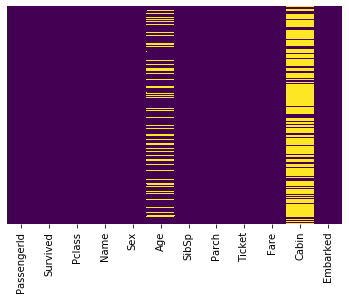

In [9]:
# we can create heat map using seaborn to check where missing data is present
# it will show there are missing values present in "Age" and "Cabin" attribute
sns.heatmap(titanic_dataframe.isnull(),yticklabels=False,cbar=False,cmap='viridis')

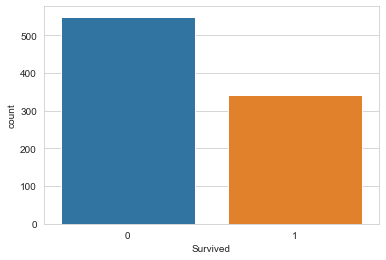

In [10]:
# go for more visualisation
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic_dataframe)

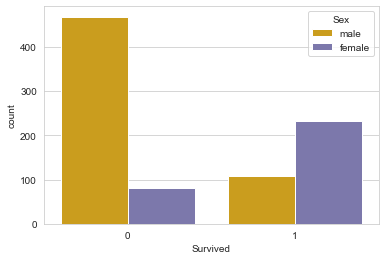

In [11]:
# above technique is used again
# hue parameter differentiated based on the Servived column
sns.set_style('whitegrid')
#sns.countplot(x='Survived',hue='Sex',data=titanic_dataframe,palette='RdBu_r')
sns.countplot(x='Survived',hue='Sex',data=titanic_dataframe,palette="Dark2_r")

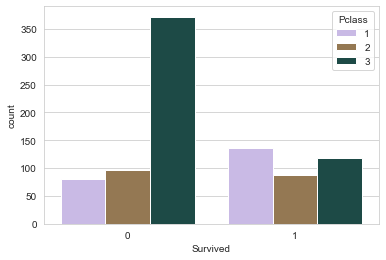

In [12]:
# now using hue parameter as Pclass
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic_dataframe,palette="cubehelix_r")

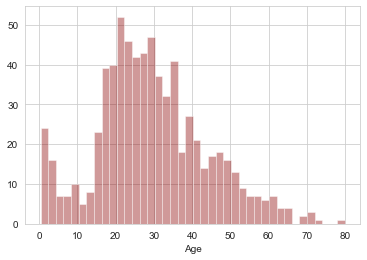

In [13]:
# we are going to see distribution of the age
# it give what is the average number of people on the ship
# sns.distplot(titanic_dataframe['Age'],kde=False,color='darkred',bins=40)
# kde is also kernel density estimation, it is used to create probability density function
sns.distplot(titanic_dataframe['Age'].dropna(),kde=False,color='darkred',bins=40)

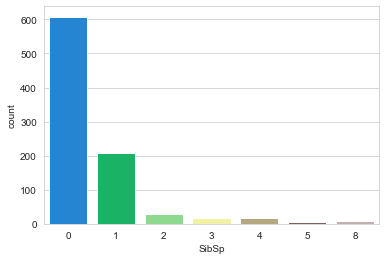

In [14]:
# count plot of SibSp
sns.set_style('whitegrid')
sns.countplot(x='SibSp',data=titanic_dataframe,palette="terrain")

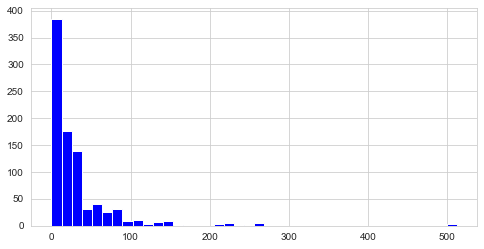

In [15]:
# plotted histogram of Fare to check average Fare value
titanic_dataframe['Fare'].hist(color='blue',bins=40,figsize=(8,4))

## Data Cleaning

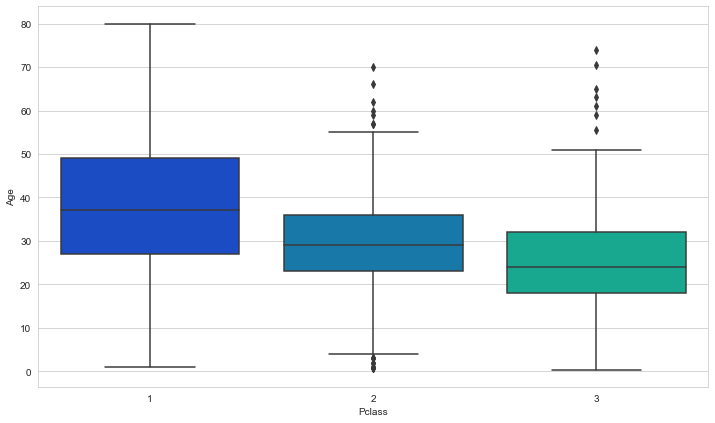

In [16]:
# x-axis , three passenger class
# y-axis is Age
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanic_dataframe,palette='winter')

In [17]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            # 37 is mean value this Pclass
            return 37

        elif Pclass == 2:
            # 29 is mean value this Pclass
            return 29

        else:
            # 24 is mean value this Pclass
            return 24

    else:
        # else we are returning Age value
        # i.e when age is not null
        return Age

In [18]:
# now applying this function 

In [19]:
# for each and every record in Pclass and Age going to apply impute_age function  
titanic_dataframe["Age"]=titanic_dataframe[["Age","Pclass"]].apply(impute_age,axis=1)

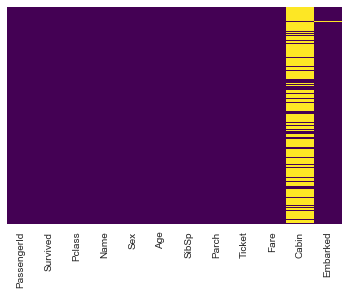

In [20]:
# now again checking the heat-map of the data
# we will see only "Cabin" has null values
sns.heatmap(titanic_dataframe.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
# if we check , "Cabin" attribute is not much important to get our final prediction, also it contains,
# many NaN value, so we will delete that column, if we want to replace values in this column with 
# non null values, we have to apply lots of feature engineering(I didnt find any pattern in that 
# column data)
titanic_dataframe.drop(labels="Cabin",inplace=True,axis=1)

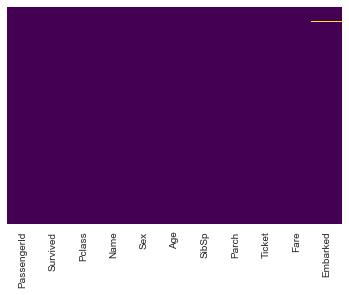

In [22]:
# now again checking the heat-map of the data
# we will see only "Cabin" has null values
sns.heatmap(titanic_dataframe.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
titanic_dataframe.dropna(inplace=True)

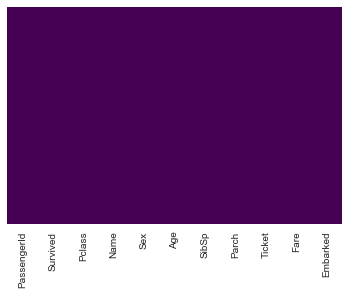

In [24]:
# now again checking the heat-map of the data
# we will see only "Cabin" has null values
sns.heatmap(titanic_dataframe.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Converting Categorical Features

In [25]:
titanic_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [26]:
sex = pd.get_dummies(titanic_dataframe['Sex'],drop_first=True)
embark = pd.get_dummies(titanic_dataframe['Embarked'],drop_first=True)

In [27]:
# titanic_dataframe.tail()

In [28]:
# embark

In [29]:
# sex

In [30]:
# Sex and Embarked we have converted to categorical value
# Name and Ticket does not play any role for output
# dropping all these columns
titanic_dataframe.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [31]:
titanic_dataframe.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [32]:
# adding modified column values to original dataframe
titanic_dataframe = pd.concat([titanic_dataframe,sex,embark],axis=1)

In [33]:
titanic_dataframe.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### Our Data is Ready for model creation

## Building a Logistic Regression model

In [34]:
# X
X=titanic_dataframe.drop('Survived',axis=1)

In [35]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [36]:
# y
y=titanic_dataframe['Survived']

In [37]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
# X_train, X_test, y_train, y_test = train_test_split(titanic_dataframe.drop('Survived',axis=1), 
#                                                     titanic_dataframe['Survived'], test_size=0.20, 
#                                                     random_state=101)

In [40]:
# above code and this code is same
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=101)

## Training and Predicting

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
# got logmodel, which is our final Model used for prediciton
logmodel = LogisticRegression(max_iter=4000)
# here model training starts
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=4000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
#X_test.head()

In [44]:
# always remember array passed to predict function is 2D array
# else you will get error
# 0 prediction means person died
# 1 prediction means person servived
single_prediction=logmodel.predict([[512,3,24.0,0,0,8.05,1,0,1]])
print("Trying single prediction one : ",single_prediction)
single_prediction=logmodel.predict([[757,3,28.0,0,0,8.79,1,0,1]])
print("Trying single prediction two : ",single_prediction)
single_prediction=logmodel.predict([[190,4,50,1,1,69.55,0,1,0]])
print("Trying single prediction three : ",single_prediction)
single_prediction=logmodel.predict([[1,1,38.0,1,0,71.2833,0,0,0]])
print("Trying single prediction four : ",single_prediction)

Trying single prediction one :  [0]
Trying single prediction two :  [0]
Trying single prediction three :  [0]
Trying single prediction four :  [1]


In [45]:
# we get predictions on our test dataset
predictions = logmodel.predict(X_test)

In [46]:
#predictions

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
accuracy=confusion_matrix(y_test,predictions)

In [49]:
accuracy

array([[99,  8],
       [24, 47]], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8202247191011236

In [52]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0], dtype=int64)

## Evaluation

In [53]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       107
           1       0.85      0.66      0.75        71

    accuracy                           0.82       178
   macro avg       0.83      0.79      0.80       178
weighted avg       0.82      0.82      0.82       178

